<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01163204/blob/main/Actividad_06_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nombre: Juan Carlos Torres Luna
## Matricula: A01163204
## Ciencia y analítica de datos (Gpo 10)
## 10/31/22
## Semana 6: Visualizacion

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

### Obtenemos info del data set

In [3]:
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(url)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [35]:
df.shape

(30000, 25)

In [4]:
ndf1 = df.drop('ID', axis=1)
ndf1 = ndf1.rename(columns={'X1': 'Amount_of_given_credit'})
ndf1 = ndf1.rename(columns={'X2': 'Gender'})
ndf1 = ndf1.rename(columns={'X3': 'Education'})
ndf1 = ndf1.rename(columns={'X4': 'Marital_Status'})
ndf1 = ndf1.rename(columns={'X5': 'Age'})
ndf1 = ndf1.rename(columns={'X6': 'Pay01'})
ndf1 = ndf1.rename(columns={'X7': 'Pay02'})
ndf1 = ndf1.rename(columns={'X8': 'Pay03'})
ndf1 = ndf1.rename(columns={'X9': 'Pay04'})
ndf1 = ndf1.rename(columns={'X10': 'Pay05'})
ndf1 = ndf1.rename(columns={'X11': 'Pay06'})
ndf1 = ndf1.rename(columns={'X12': 'Amount_Bill_01'})
ndf1 = ndf1.rename(columns={'X13': 'Amount_Bill_02'})
ndf1 = ndf1.rename(columns={'X14': 'Amount_Bill_03'})
ndf1 = ndf1.rename(columns={'X15': 'Amount_Bill_04'})
ndf1 = ndf1.rename(columns={'X16': 'Amount_Bill_05'})
ndf1 = ndf1.rename(columns={'X17': 'Amount_Bill_06'})
ndf1 = ndf1.rename(columns={'X18': 'Amount_Prev_Pay_01'})
ndf1 = ndf1.rename(columns={'X19': 'Amount_Prev_Pay_02'})
ndf1 = ndf1.rename(columns={'X20': 'Amount_Prev_Pay_03'})
ndf1 = ndf1.rename(columns={'X21': 'Amount_Prev_Pay_04'})
ndf1 = ndf1.rename(columns={'X22': 'Amount_Prev_Pay_05'})
ndf1 = ndf1.rename(columns={'X23': 'Amount_Prev_Pay_06'})
ndf1 = ndf1.rename(columns={'Y': 'Credible_client'})
ndf1.head()

,Amount_of_given_credit,Gender,Education,Marital_Status,Age,Pay01,Pay02,Pay03,Pay04,Pay05,...,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [12]:
ndf1.dtypes

Amount_of_given_credit      int64
Gender                    float64
Education                 float64
Marital_Status            float64
Age                       float64
Pay01                     float64
Pay02                     float64
Pay03                     float64
Pay04                     float64
Pay05                     float64
Pay06                     float64
Amount_Bill_01            float64
Amount_Bill_02            float64
Amount_Bill_03            float64
Amount_Bill_04            float64
Amount_Bill_05            float64
Amount_Bill_06            float64
Amount_Prev_Pay_01        float64
Amount_Prev_Pay_02        float64
Amount_Prev_Pay_03        float64
Amount_Prev_Pay_04        float64
Amount_Prev_Pay_05        float64
Amount_Prev_Pay_06        float64
Credible_client           float64
dtype: object

In [13]:
ndf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Amount_of_given_credit  30000 non-null  int64  
 1   Gender                  29999 non-null  float64
 2   Education               29998 non-null  float64
 3   Marital_Status          29998 non-null  float64
 4   Age                     29995 non-null  float64
 5   Pay01                   29997 non-null  float64
 6   Pay02                   29995 non-null  float64
 7   Pay03                   29993 non-null  float64
 8   Pay04                   29991 non-null  float64
 9   Pay05                   29984 non-null  float64
 10  Pay06                   29986 non-null  float64
 11  Amount_Bill_01          29989 non-null  float64
 12  Amount_Bill_02          29989 non-null  float64
 13  Amount_Bill_03          29987 non-null  float64
 14  Amount_Bill_04          29985 non-null

In [14]:
ndf1.isna()

,Amount_of_given_credit,Gender,Education,Marital_Status,Age,Pay01,Pay02,Pay03,Pay04,Pay05,...,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Limpieza de datos

In [5]:
to_clean_education = (ndf1.Education == 0) | (ndf1.Education == 5) | (ndf1.Education == 6)
ndf1.loc[to_clean_education, 'Education'] = 4
ndf1['Education'].value_counts()

to_clean_maritalStatus = (ndf1.Marital_Status == 0)
ndf1.loc[to_clean_maritalStatus, 'Marital_Status'] = 3
ndf1['Marital_Status'].value_counts()

to_clean_Pay01  = (ndf1.Pay01 == -2) | (ndf1.Pay01 == -1) | (ndf1.Pay01 == 0)
to_clean_Pay02  = (ndf1.Pay02 == -2) | (ndf1.Pay02 == -1) | (ndf1.Pay02 == 0)
to_clean_Pay03  = (ndf1.Pay03 == -2) | (ndf1.Pay03 == -1) | (ndf1.Pay03 == 0)
to_clean_Pay04  = (ndf1.Pay04 == -2) | (ndf1.Pay04 == -1) | (ndf1.Pay04 == 0)
to_clean_Pay05  = (ndf1.Pay05 == -2) | (ndf1.Pay05 == -1) | (ndf1.Pay05 == 0)
to_clean_Pay06  = (ndf1.Pay06 == -2) | (ndf1.Pay06 == -1) | (ndf1.Pay06 == 0)

ndf1.loc[to_clean_Pay01, 'Pay01'] = 0
ndf1.loc[to_clean_Pay02, 'Pay02'] = 0
ndf1.loc[to_clean_Pay03, 'Pay03'] = 0
ndf1.loc[to_clean_Pay04, 'Pay04'] = 0
ndf1.loc[to_clean_Pay05, 'Pay05'] = 0
ndf1.loc[to_clean_Pay06, 'Pay06'] = 0

good_customer = (ndf1.Pay01 == 0) & (ndf1.Pay02 == 0) & (ndf1.Pay03 == 0) & (ndf1.Pay04 == 0) & (ndf1.Pay05 == 0) & (ndf1.Pay06 == 0) & (ndf1.Credible_client == 1)
potential_bad_customer = (ndf1.Pay01 > 0) & (ndf1.Pay02 > 0) & (ndf1.Pay03 > 0) & (ndf1.Pay04 > 0) & (ndf1.Pay05 > 0) & (ndf1.Pay06 > 0) & (ndf1.Credible_client == 0)

ndf1.loc[good_customer, 'Credible_client'] = 0
ndf1.loc[potential_bad_customer, 'Credible_client'] = 1
ndf1['Credible_client'].value_counts()

to_clean_AmountBill01 = (ndf1.Amount_Bill_01 < 0)
to_clean_AmountBill02 = (ndf1.Amount_Bill_02 < 0)
to_clean_AmountBill03 = (ndf1.Amount_Bill_03 < 0)
to_clean_AmountBill04 = (ndf1.Amount_Bill_04 < 0)
to_clean_AmountBill05 = (ndf1.Amount_Bill_05 < 0)
to_clean_AmountBill06 = (ndf1.Amount_Bill_06 < 0)

ndf1.loc[to_clean_AmountBill01, 'Amount_Bill_01'] = 0
ndf1.loc[to_clean_AmountBill02, 'Amount_Bill_02'] = 0
ndf1.loc[to_clean_AmountBill03, 'Amount_Bill_03'] = 0
ndf1.loc[to_clean_AmountBill04, 'Amount_Bill_04'] = 0
ndf1.loc[to_clean_AmountBill05, 'Amount_Bill_05'] = 0
ndf1.loc[to_clean_AmountBill06, 'Amount_Bill_06'] = 0

ndf1.columns

Index(['Amount_of_given_credit', 'Gender', 'Education', 'Marital_Status',
       'Age', 'Pay01', 'Pay02', 'Pay03', 'Pay04', 'Pay05', 'Pay06',
       'Amount_Bill_01', 'Amount_Bill_02', 'Amount_Bill_03', 'Amount_Bill_04',
       'Amount_Bill_05', 'Amount_Bill_06', 'Amount_Prev_Pay_01',
       'Amount_Prev_Pay_02', 'Amount_Prev_Pay_03', 'Amount_Prev_Pay_04',
       'Amount_Prev_Pay_05', 'Amount_Prev_Pay_06', 'Credible_client'],
      dtype='object')

In [6]:
ndf1.isnull().sum()


Amount_of_given_credit     0
Gender                     1
Education                  2
Marital_Status             2
Age                        5
Pay01                      3
Pay02                      5
Pay03                      7
Pay04                      9
Pay05                     16
Pay06                     14
Amount_Bill_01            11
Amount_Bill_02            11
Amount_Bill_03            13
Amount_Bill_04            15
Amount_Bill_05            17
Amount_Bill_06            10
Amount_Prev_Pay_01         8
Amount_Prev_Pay_02         9
Amount_Prev_Pay_03         8
Amount_Prev_Pay_04        11
Amount_Prev_Pay_05        11
Amount_Prev_Pay_06         5
Credible_client            3
dtype: int64

In [7]:
# Limpieza de datos nulos

ndf2 = ndf1.copy()
ndf2


,Amount_of_given_credit,Gender,Education,Marital_Status,Age,Pay01,Pay02,Pay03,Pay04,Pay05,...,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1.0,3.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,1.0,3.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [8]:
gender_median = ndf2.Gender.median()
gender_median

education_median = ndf2.Education.median()
education_median

marital_status = ndf2.Marital_Status.median()
marital_status

age_median = ndf2.Age.median()
age_median

pay01_median = ndf2.Pay01.median()
pay02_median = ndf2.Pay02.median()
pay03_median = ndf2.Pay03.median()
pay04_median = ndf2.Pay04.median()
pay05_median = ndf2.Pay05.median()
pay06_median = ndf2.Pay06.median()

credible_client_median = ndf2.Credible_client.median()
credible_client_median

amount_of_given_credit_mean = ndf2.Amount_of_given_credit.mean()
amount_of_given_credit_mean

amount_bill_01_mean = ndf2.Amount_Bill_01.mean()
amount_bill_02_mean = ndf2.Amount_Bill_02.mean()
amount_bill_03_mean = ndf2.Amount_Bill_03.mean()
amount_bill_04_mean = ndf2.Amount_Bill_04.mean()
amount_bill_05_mean = ndf2.Amount_Bill_05.mean()
amount_bill_06_mean = ndf2.Amount_Bill_06.mean()

amount_prev_bill_01 = ndf2.Amount_Prev_Pay_01.mean()
amount_prev_bill_02 = ndf2.Amount_Prev_Pay_02.mean()
amount_prev_bill_03 = ndf2.Amount_Prev_Pay_03.mean()
amount_prev_bill_04 = ndf2.Amount_Prev_Pay_04.mean()
amount_prev_bill_05 = ndf2.Amount_Prev_Pay_05.mean()
amount_prev_bill_06 = ndf2.Amount_Prev_Pay_06.mean()

In [9]:
ndf2['Amount_of_given_credit'].fillna(value = amount_of_given_credit_mean, inplace = True)
ndf2['Gender'].fillna(value = gender_median, inplace = True)
ndf2['Education'].fillna(value = education_median, inplace = True)
ndf2['Marital_Status'].fillna(value = marital_status, inplace = True)
ndf2['Age'].fillna(value = age_median, inplace = True)
ndf2['Pay01'].fillna(value = pay01_median, inplace = True)
ndf2['Pay02'].fillna(value = pay02_median, inplace = True)
ndf2['Pay03'].fillna(value = pay03_median, inplace = True)
ndf2['Pay04'].fillna(value = pay04_median, inplace = True)
ndf2['Pay05'].fillna(value = pay05_median, inplace = True)
ndf2['Pay06'].fillna(value = pay06_median, inplace = True)
ndf2['Amount_Bill_01'].fillna(value = amount_bill_01_mean, inplace = True)
ndf2['Amount_Bill_02'].fillna(value = amount_bill_02_mean, inplace = True)
ndf2['Amount_Bill_03'].fillna(value = amount_bill_03_mean, inplace = True)
ndf2['Amount_Bill_04'].fillna(value = amount_bill_04_mean, inplace = True)
ndf2['Amount_Bill_05'].fillna(value = amount_bill_05_mean, inplace = True)
ndf2['Amount_Bill_06'].fillna(value = amount_bill_06_mean, inplace = True)
ndf2['Amount_Prev_Pay_01'].fillna(value = amount_prev_bill_01, inplace = True)
ndf2['Amount_Prev_Pay_02'].fillna(value = amount_prev_bill_02, inplace = True)
ndf2['Amount_Prev_Pay_03'].fillna(value = amount_prev_bill_03, inplace = True)
ndf2['Amount_Prev_Pay_04'].fillna(value = amount_prev_bill_04, inplace = True)
ndf2['Amount_Prev_Pay_05'].fillna(value = amount_prev_bill_05, inplace = True)
ndf2['Amount_Prev_Pay_06'].fillna(value = amount_prev_bill_06, inplace = True)
ndf2['Credible_client'].fillna(value = credible_client_median, inplace = True)

ndf2

,Amount_of_given_credit,Gender,Education,Marital_Status,Age,Pay01,Pay02,Pay03,Pay04,Pay05,...,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1.0,3.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,1.0,3.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [10]:
ndf2.isnull().sum()

Amount_of_given_credit    0
Gender                    0
Education                 0
Marital_Status            0
Age                       0
Pay01                     0
Pay02                     0
Pay03                     0
Pay04                     0
Pay05                     0
Pay06                     0
Amount_Bill_01            0
Amount_Bill_02            0
Amount_Bill_03            0
Amount_Bill_04            0
Amount_Bill_05            0
Amount_Bill_06            0
Amount_Prev_Pay_01        0
Amount_Prev_Pay_02        0
Amount_Prev_Pay_03        0
Amount_Prev_Pay_04        0
Amount_Prev_Pay_05        0
Amount_Prev_Pay_06        0
Credible_client           0
dtype: int64

### Descripcion de los datos

In [16]:
ndf2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Amount_of_given_credit,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
Gender,30000.0,1.603767,0.489122,1.0,1.00,2.0,2.00,2.0
Education,30000.0,1.842200,0.744436,1.0,1.00,2.0,2.00,4.0
Marital_Status,30000.0,1.557333,0.521397,1.0,1.00,2.0,2.00,3.0
Age,30000.0,35.483967,9.217276,21.0,28.00,34.0,41.00,79.0
Pay01,30000.0,0.356767,0.760594,0.0,0.00,0.0,0.00,8.0
Pay02,30000.0,0.320033,0.801727,0.0,0.00,0.0,0.00,8.0
Pay03,30000.0,0.303800,0.789341,0.0,0.00,0.0,0.00,8.0
Pay04,30000.0,0.258633,0.760983,0.0,0.00,0.0,0.00,8.0
Pay05,30000.0,0.221367,0.717575,0.0,0.00,0.0,0.00,8.0


### Eliminamos variables categoricas


In [47]:
ndf3 = ndf2.drop(['Gender','Education','Marital_Status','Pay01','Pay02','Pay03','Pay04','Pay05','Pay06'], axis = 1)
ndf3

,Amount_of_given_credit,Age,Amount_Bill_01,Amount_Bill_02,Amount_Bill_03,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,41.0,0.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [48]:
ndf3.corr()

,Amount_of_given_credit,Age,Amount_Bill_01,Amount_Bill_02,Amount_Bill_03,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
Amount_of_given_credit,1.000000,0.144651,0.285726,0.278585,0.283534,0.294345,0.295796,0.291519,0.195268,0.178396,0.210101,0.203205,0.217124,0.219573,-0.187145
Age,0.144651,1.000000,0.056368,0.054417,0.053939,0.051660,0.049453,0.047688,0.025951,0.021788,0.029215,0.021352,0.022764,0.019508,-0.002972
Amount_Bill_01,0.285726,0.056368,1.000000,0.952276,0.893237,0.861229,0.830507,0.804313,0.143682,0.100077,0.156982,0.158388,0.167266,0.179412,-0.016761
Amount_Bill_02,0.278585,0.054417,0.952276,1.000000,0.928923,0.893285,0.860270,0.832962,0.280362,0.102403,0.151160,0.147517,0.158329,0.174301,-0.005160
Amount_Bill_03,0.283534,0.053939,0.893237,0.928923,1.000000,0.924865,0.884554,0.854786,0.244743,0.316963,0.132156,0.143639,0.179881,0.182468,-0.000155
Amount_Bill_04,0.294345,0.051660,0.861229,0.893285,0.924865,1.000000,0.940940,0.902585,0.233159,0.207639,0.300241,0.134592,0.160659,0.177765,0.014310
Amount_Bill_05,0.295796,0.049453,0.830507,0.860270,0.884554,0.940940,1.000000,0.947474,0.217094,0.181253,0.252365,0.293385,0.143239,0.164486,0.025135
Amount_Bill_06,0.291519,0.047688,0.804313,0.832962,0.854786,0.902585,0.947474,1.000000,0.200382,0.172857,0.234082,0.250495,0.308041,0.123044,0.027957
Amount_Prev_Pay_01,0.195268,0.025951,0.143682,0.280362,0.244743,0.233159,0.217094,0.200382,1.000000,0.285601,0.252206,0.199588,0.148469,0.185756,-0.075525
Amount_Prev_Pay_02,0.178396,0.021788,0.100077,0.102403,0.316963,0.207639,0.181253,0.172857,0.285601,1.000000,0.244770,0.180096,0.180894,0.157617,-0.059647


### Reducir dimensiones con PCA sin reduccion



In [26]:
cn = ["Amount_of_given_credit",	"Age", "Amount_Bill_01",	"Amount_Bill_02",	"Amount_Bill_03",	"Amount_Bill_04",	"Amount_Bill_05",	"Amount_Bill_06",	"Amount_Prev_Pay_01",	"Amount_Prev_Pay_02",	"Amount_Prev_Pay_03",	"Amount_Prev_Pay_04",	"Amount_Prev_Pay_05",	"Amount_Prev_Pay_06",	"Credible_client"]

In [27]:
summary = {
  "Variances": ndf3[cn].var()[0:11],
  "Min": ndf3[cn].min()[0:11],
  "Max": ndf3[cn].max()[0:11]
}

In [29]:
pd.DataFrame(summary, index=cn)

,Variances,Min,Max
Amount_of_given_credit,1.683446e+10,10000.0,1000000.0
Age,8.495817e+01,21.0,79.0
Amount_Bill_01,5.417531e+09,0.0,964511.0
Amount_Bill_02,5.061939e+09,0.0,983931.0
Amount_Bill_03,4.804599e+09,0.0,1664089.0
Amount_Bill_04,4.133399e+09,0.0,891586.0
Amount_Bill_05,3.692046e+09,0.0,927171.0
Amount_Bill_06,3.533498e+09,0.0,961664.0
Amount_Prev_Pay_01,2.742984e+08,0.0,873552.0
Amount_Prev_Pay_02,5.308748e+08,0.0,1684259.0


In [30]:
ndf3.var().sum()

45387487338.54791

In [31]:
ndf4 = PCA()
ndf4.fit(ndf3.iloc[:, 0:].dropna(axis=0))
ndf4S = pd.DataFrame({
    'Standard deviation': np.sqrt(ndf4.explained_variance_),
    'Proportion of variance': ndf4.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(ndf4.explained_variance_ratio_)
})

In [32]:
ndf4S

,Standard deviation,Proportion of variance,Cumulative proportion
0,166506.170826,6.108359e-01,0.610836
1,115799.964158,2.954478e-01,0.906284
2,37138.160607,3.038818e-02,0.936672
3,27658.249607,1.685440e-02,0.953526
4,20638.824858,9.384989e-03,0.962911
5,20123.184964,8.921899e-03,0.971833
6,18370.175988,7.435163e-03,0.979268
7,16910.549525,6.300562e-03,0.985569
8,16306.798412,5.858700e-03,0.991428
9,11643.042831,2.986736e-03,0.994414


### Histogramas

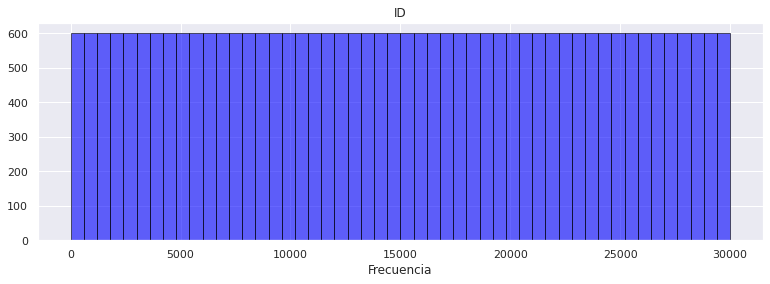

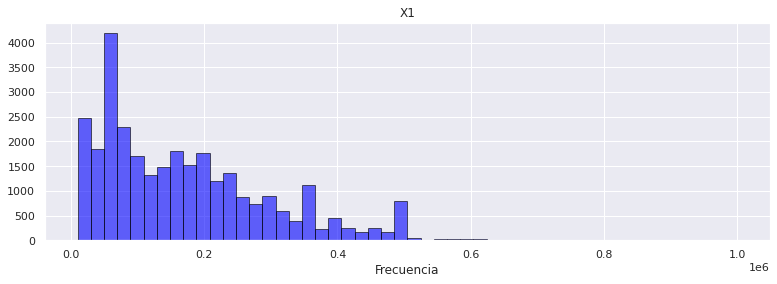

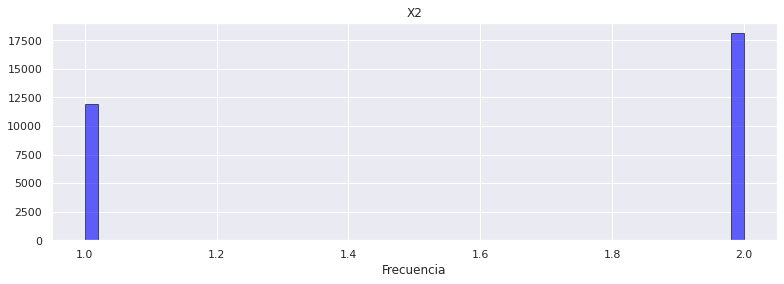

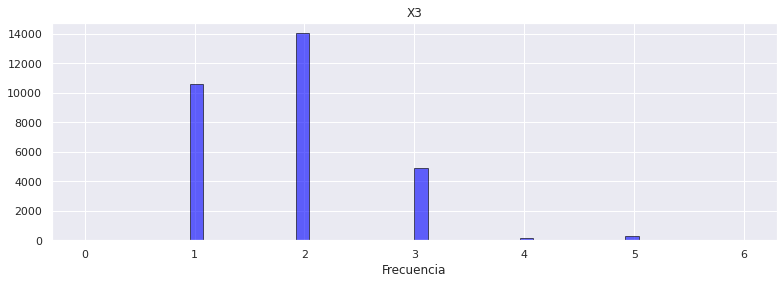

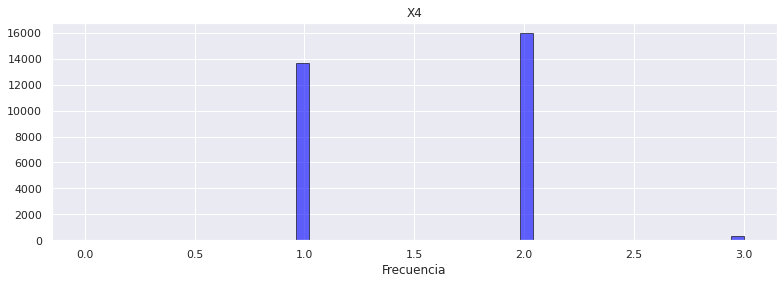

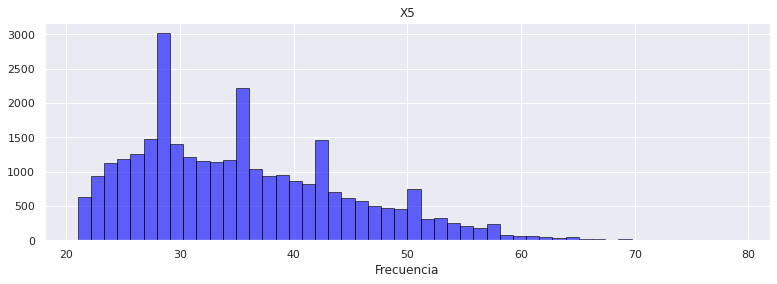

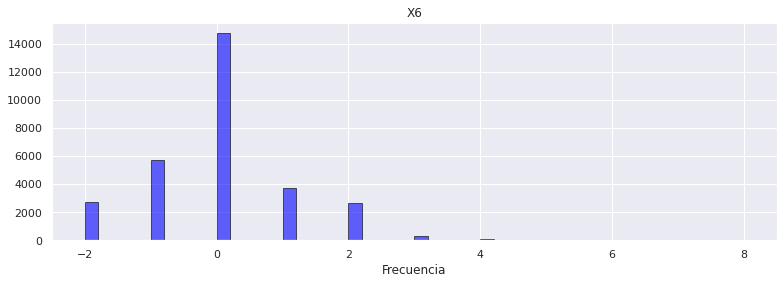

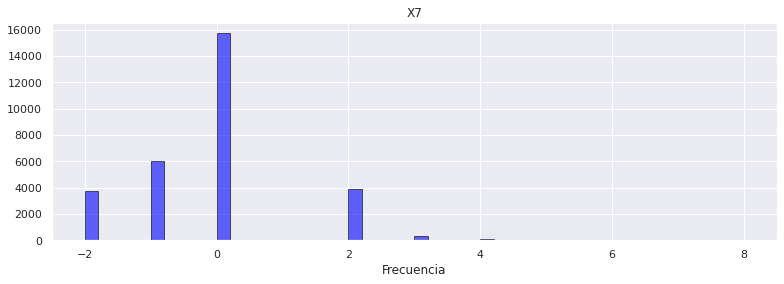

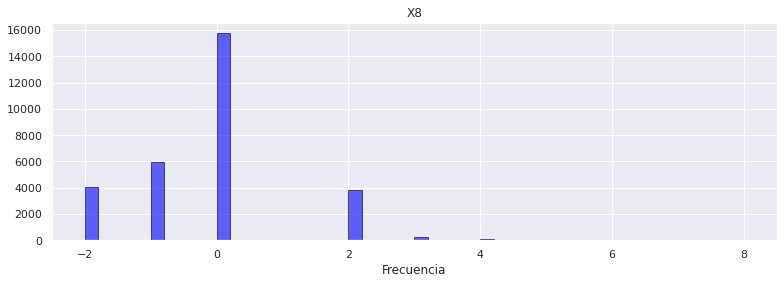

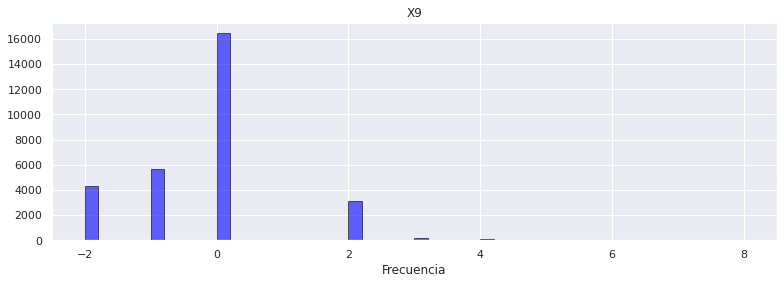

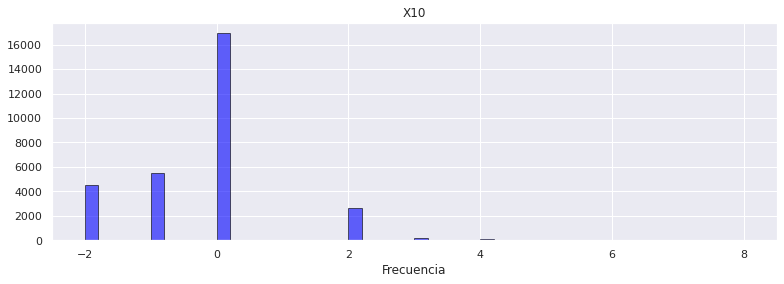

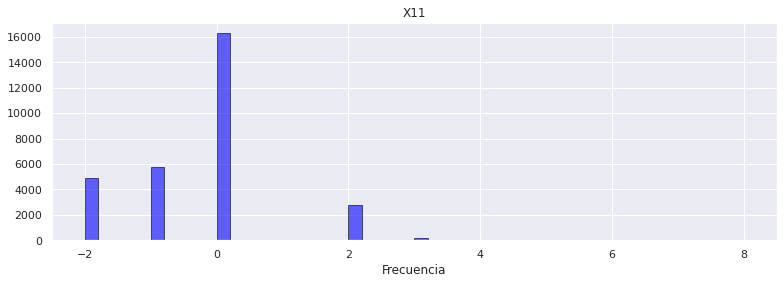

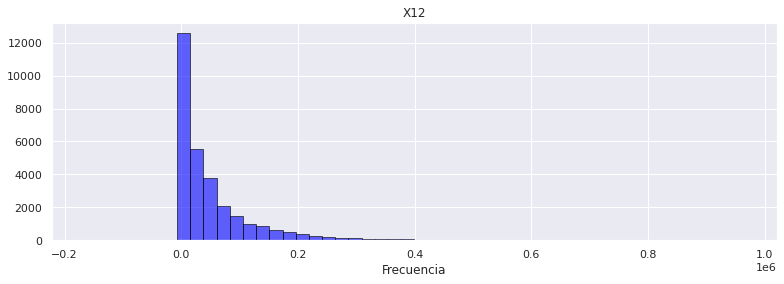

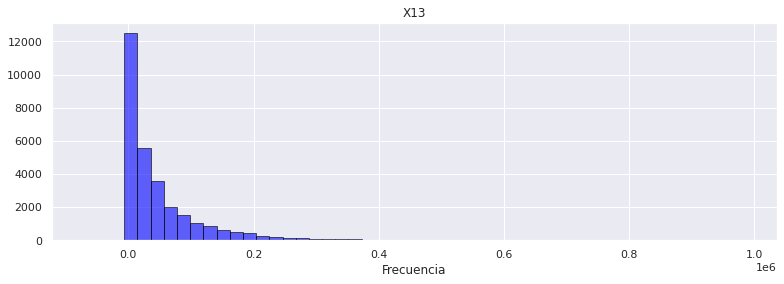

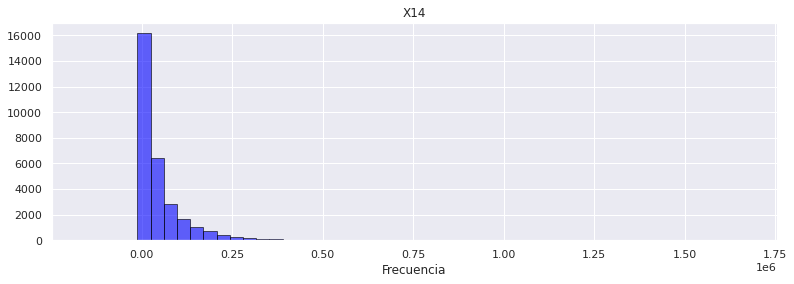

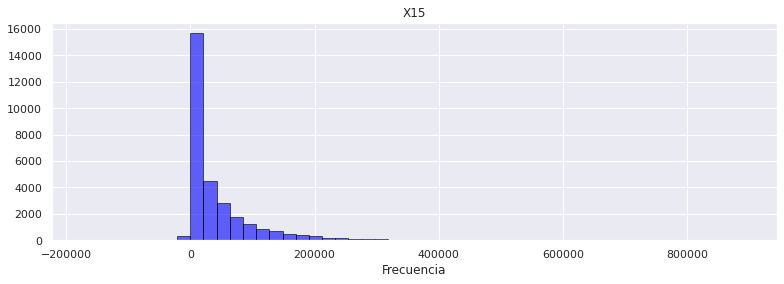

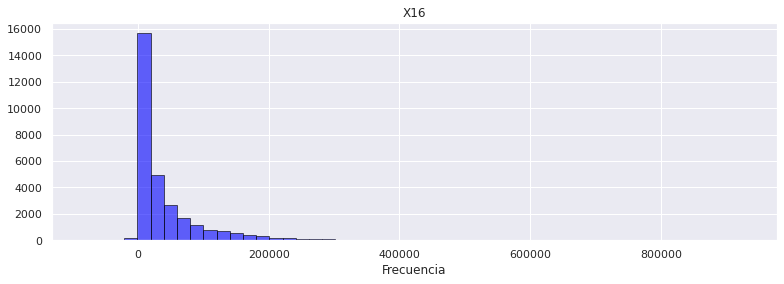

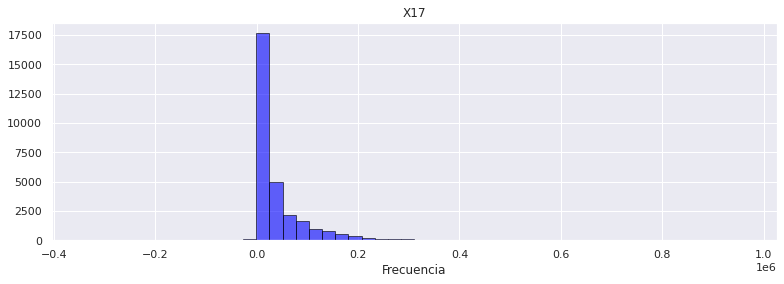

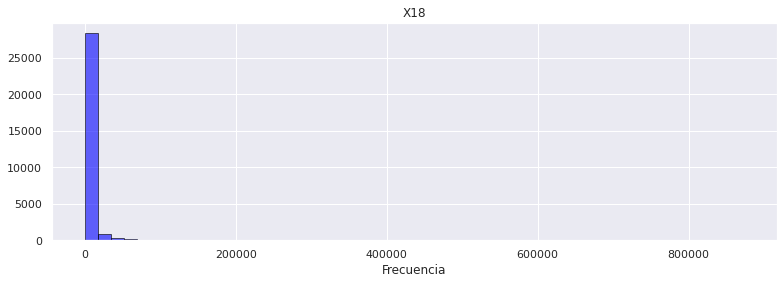

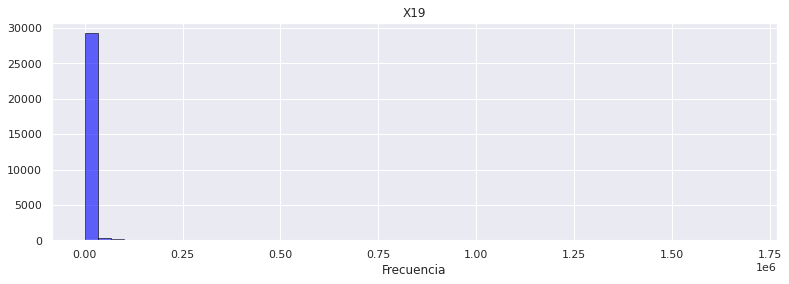

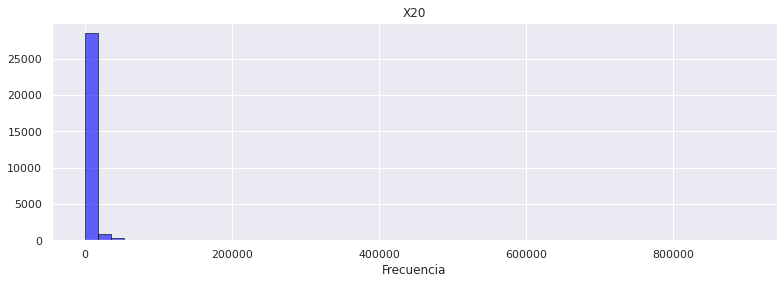

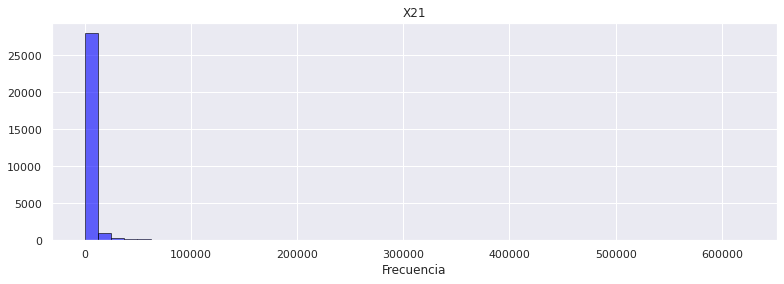

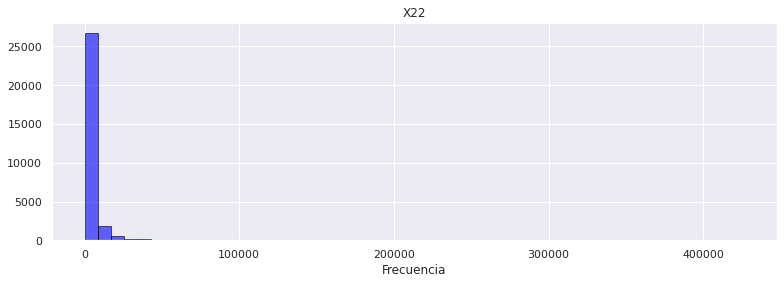

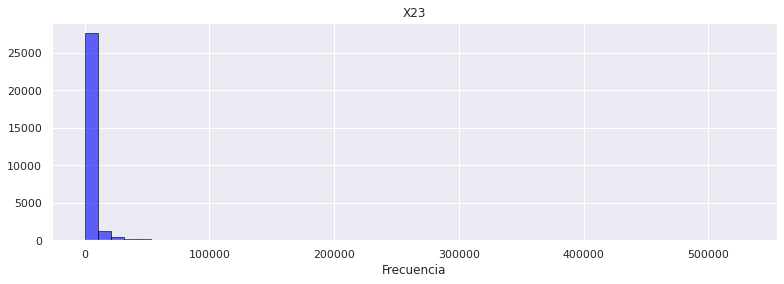

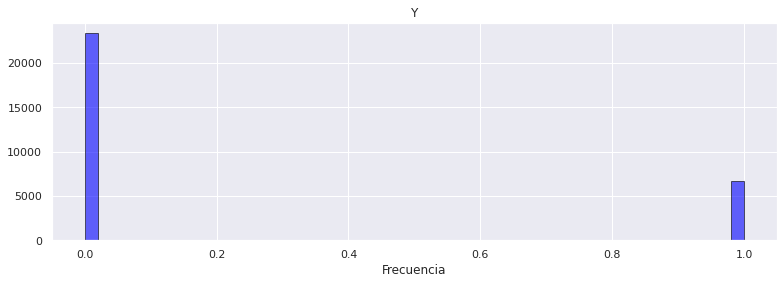

In [52]:
for i in df.columns.to_list():
  plt.figure(figsize=(13,4)) #tamaño de las gráficas
  n,bins,patch = plt.hist(df[i],bins=50, color='blue', alpha=0.6, label='Value', edgecolor='black', linewidth=1)
  plt.title(str(i))
  plt.xlabel('Valores')
  plt.xlabel('Frecuencia')
  plt.show()

### Visualizacion

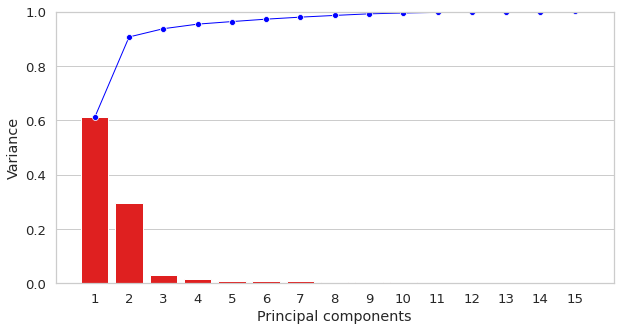

In [42]:
PC_components = np.arange(ndf4.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 5))

_ = sns.barplot(x = PC_components, 
                y = ndf4.explained_variance_ratio_, 
                color = 'red'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(ndf4.explained_variance_ratio_), 
                 color = 'blue', 
                 linestyle = '-', 
                 linewidth = 1, 
                 marker = 'o', 
                 markersize = 6
                 )

plt.xlabel('Principal components')
plt.ylabel('Variance')
plt.ylim(0, 1)
plt.show()

Text(0, 0.5, 'Y')

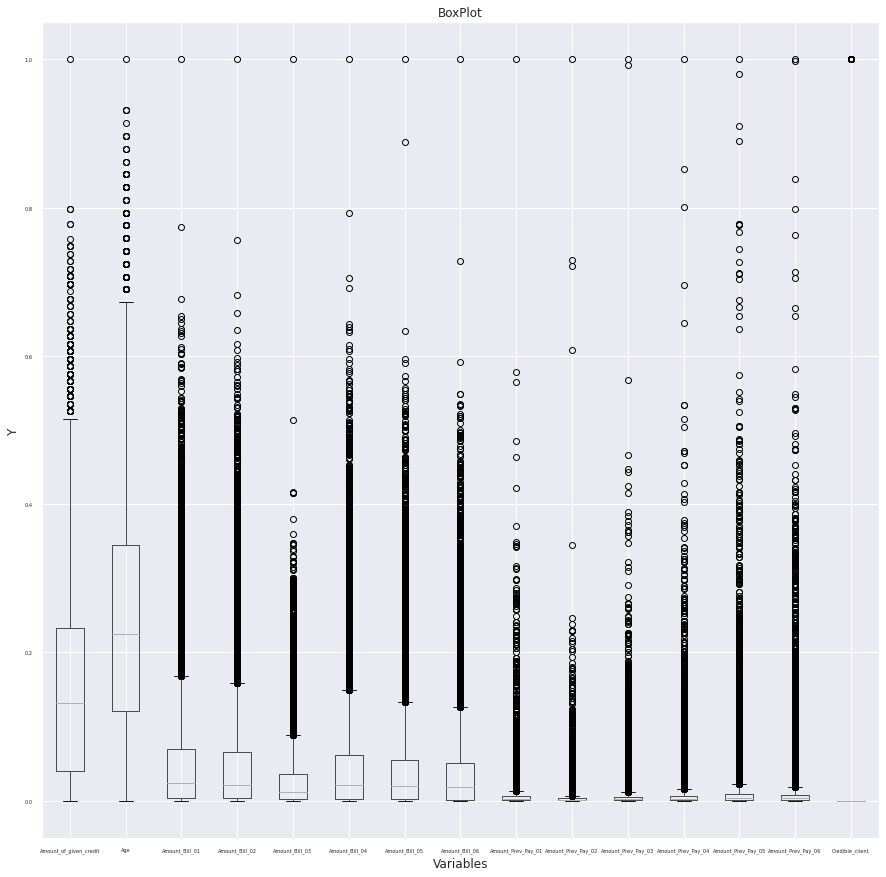

In [60]:

scaler = MinMaxScaler()
df_plot = pd.DataFrame(scaler.fit_transform(ndf3), columns = ndf3.columns)
b_plot = df_plot.boxplot(fontsize = 5) 
b_plot.plot()
plt.title('BoxPlot')
plt.xlabel('Variables')
plt.ylabel('Y')

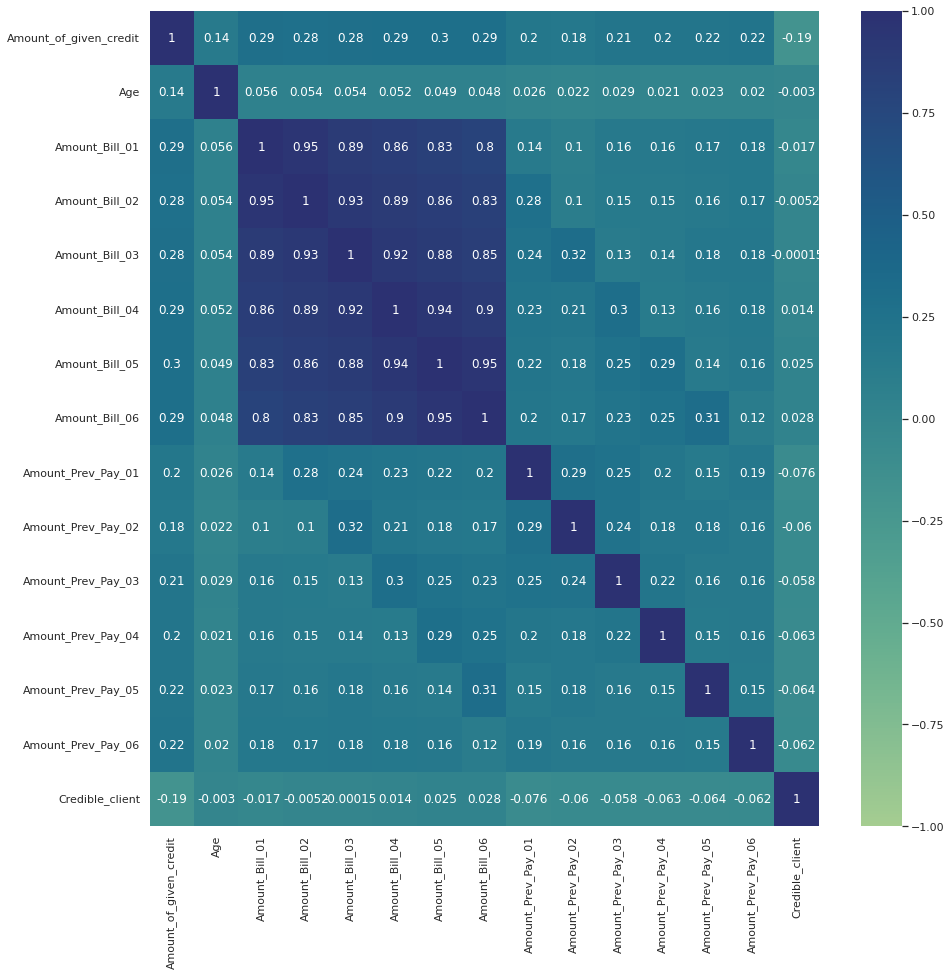

In [69]:
sns.heatmap(ndf3.corr(), cmap="crest", vmin = -1, vmax = 1, annot= True)

### Interpretacion

* En el primer gráfico podemos encontrar la correlación que se tienen entre los componentes principales y la varianza, 
conforme los valores de los componentes decrementan la varianza explorada tiene a 1. Por lo tanto, nos ayuda a tomar 
decisiones para las variables a utilizar mas importantes y desechar variables que no aportar mucho.

* En el segundo gráfico podemos ver diagramas de caja sobre las variables categóricas, donde se ve claramente un overlay 
superior a partir de la mitad de las variables además de valores atípicos, dándonos como resultados las mejores 
variables a considerar.

* En el tercer gráfico podemos ver un mapa de calor mostrándonos las correlaciones mas fuertes, en este caso los Amount 
Bill. Sin embargo, debemos tener cuidado al momento de meter estos datos a un pipeline por riesgo de sobre-entrameinto 
al momento de llegar a los mínimos locales.
